# Perceptron with Streaming data

- Created by: Si_ja
- https://github.com/Si-ja
- Date: 2019-05-06

The idea behind this notebook is to show, how we can take 2 concepts:
- Streaming of data
- Perceptron

And combine them into a Machine Learning algorithm that trains over time, as data comes to you (let's say from online) rather than taking all of the existing data and putting it into the perceptron all at once.

The reason why this works is that perceptron is one of those ML algorithms that can learn over time, without the need to be exposed to huge amounts of data all at once. This is something I wanted to work with and understand for a long time, as it is not that common in an academic environment to see,  rather data is given to you only once and that's it, you train your perceptron.

In this notebook the perceptron is developed from scratch, no sklearn libraries for it is used.
Perceptron is trained only on the iris dataset, and it is not made to be universally working, rather the notebook is here to somewhat teach the principle of how we can utilize the streaming data and train a perceptron, with a condition that a strict rule was given - to train it on the iris dataset.

It's really good when your ML algorithms are very universal in usage, but do not forget, that can take much longer to develop and in the long run might not even be useful. Therefore, this example is created in a defined enviornmental problem.

Bonus: Perceptron as it is trained only on Iris dataset and with 2 variables - will also be visualized in it's training.

Prerequisites: It's prefered if you know what a perceptron is and some math behind it. This notebook is not so much about teaching the concepts of a perceptron, but rather showing a different style of implementing it's usage.
You can read on it here: https://en.wikipedia.org/wiki/Perceptron or http://ciml.info/dl/v0_99/ciml-v0_99-ch04.pdf

Let's start small and prepare our data. What will be our test data, train data and initilize the creation of perceptron weights with a bias value. All values in the perceptron's weights are initialy set to 0, but overal it does not matter too much what you set them, as over long enough period of training time - they will update to what they need to be (presumably need to).

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import clear_output

def data_prepare(first_col = 0, second_col = 1):
    """Prepare our data and feed into a global environemnt to have these things done and up for use."""
    first_col = first_col
    second_col = second_col
    
    iris = datasets.load_iris()
    #Using 2 groups - so only need instance from 0 to 99. Remaining 100-149 belong to group 2.
    #We will have a simple binary perceptron, so we deal only with 2 groups rather than 3.
    X = iris.data[:100, (first_col, second_col)]
    Y = iris.target.reshape((150, 1))[:100]
    
    #Stack information together like you would see it in the same array fully together.
    XY = np.hstack((X, Y))
    
    #Conveniently split our data for training
    #Y will not matter for assigning anything, it's just temporarily there
    #to fill in the space
    XY_train, XY_test, _, _ = train_test_split(XY, Y, test_size = .25, random_state = 665)
    
    #Assign our data that will be used for "surprise updates" and one for testing.
    train_data = XY_train
    test_data = XY_test 
    
    #We can as well initialize the creation of our perceptron to make things faster
    
    #Create seperatelly a weighted term and a bias term
    w = (np.zeros(2)).reshape((1,2))
    b = (np.array(0.0)).reshape(1,1)
    #We could have done that at the same time but that would be boring
    #So stack them now
    w_b = np.hstack((w, b))[0]
    
    return train_data, test_data, w_b

train_data, test_data, model = data_prepare()

In [2]:
#Let's see what we are operating with
print("Training Data:")
print(train_data[:5,:])
print()
print("Testing Data:")
print(test_data[:5,:])
print()
print("Perceptron model:")
print(model)
print()
print("Nice...")

Training Data:
[[4.4 2.9 0. ]
 [5.7 3.  1. ]
 [5.6 3.  1. ]
 [5.5 3.5 0. ]
 [5.  2.3 1. ]]

Testing Data:
[[5.8 4.  0. ]
 [4.3 3.  0. ]
 [6.7 3.1 1. ]
 [5.5 2.4 1. ]
 [5.4 3.  1. ]]

Perceptron model:
[0. 0. 0.]

Nice...


Let's experiment with creating of a function that will generate some data, save it into a .txt file and also a function that would read that data, but only the last line of it. Imagine you have a file into which data that is scrapped from online is streamed, it will be already processed and clean (it's a major assumption - not always correct for the real world) and you only want to use the last instance to use it for training of your perceptron.

In [3]:
def generate_read(train_data):
    """Generate and read data. One function for the price of one execution.""" 
    train_data = train_data
    
    #Further two functions are prepared - to write data and read it.
    
    def generator(XY_train = train_data):
        """Generate information to populate the file from the train_data we chose from before."""
        #The data we chose to generate is of a random existing instance
        #So it is not trivial and if we run for 75 steps (as that is the amount of data in the training_set)
        #It is not necessery that we will see all examples used, which is closer to real life scenario type deal
        write_array = XY_train[np.random.randint(low = 0, high = (len(XY_train) - 1), dtype = int)]
        array_to_text = str()
        for i, value in enumerate(write_array):
            if i == 0:
                array_to_text = array_to_text + str(value)
            else:
                array_to_text = array_to_text + "," + str(value)
        array_to_text = array_to_text + "\n"

        outF = open("Information_Infolow.txt", "a")
        outF.writelines(array_to_text)
        outF.close()
        #The data was just written into a file, there is nothing to return

    def read_data():
        """Read our newly generated data. Only the last line of it."""
        inF = open("Information_Infolow.txt")
        lineList = inF.readlines()
        inF.close()
        final_line = lineList[len(lineList)-1].strip()
        
        #our data is still a text, so let's update it to be understood as numbers
        final_line = np.array(final_line.split(","), dtype = float)
        #and let us return the last instance of it
        return final_line
    
    #Now let us call the functions and proceed with data reading
    generator(train_data)
    return read_data()

In [4]:
#We can check what we have when we generate data.
#You can at this stage compare whether it matches the last line created in your txt file we are using.
#Or the first line that was created in the txt file for this instance
generate_read(train_data)

array([4.9, 3.1, 0. ])

In [5]:
#As we have our data generator and reader we are only left to create a perceptron that will be updatable.
#Perceptron updates only when it sees a reason - the reason is when it cannot predict data correctly.
#Therefore, before updating the perceptron, we need to create a function to predict something.
#It's very good, because we will re-use this function later to make predictions of our unseen data.

def predictor(data_to_predict_func):
    """Simple perceptrons prediction function. Feed it data to predict."""
    #Prediction is based on a very simple formula:
    
    prediction = np.sum(data_to_predict_func[:2] * model[:2]) + model[2]
    
    #Making the prediction in a binary fashion (either it's 1 or -1)
    #Lets be compact and make it in one line
    
    prediction = 1 if prediction >= 0 else -1
    return prediction

#After creating a predictor function, we can make an updater function as well.
def update(data_to_predict):
    """A function that will update weights of the perceptron based on what it's situation is."""
    #Let us use our created predictor function to predict data and potentially update the perceptron
    prediction = predictor(data_to_predict)
    
    #Now we will just have to distinguish between 2 classes
    #But lets take things easier and update them
    #Currently we have flowers in the class 0 and 1, but we can make them -1 and 1
    #It just helps keep track of the whole system much easier and for the sake of maths used
    
    if data_to_predict[2] == 0:
        data_to_predict[2] = -1
        
    #And now let us utilize the update mathematical function for the perceptron:
    if prediction == -1 and data_to_predict[2] == 1:
        model[:2] += data_to_predict[:2]
        model[2] += 1
    elif prediction == 1 and data_to_predict[2] == -1:
        model[:2] -= data_to_predict[:2]
        model[2] -= 1
    #since the model will be updated in the global environment - we do not need to return anything

In [35]:
#We can check how our update function works and where we end up at
#By runing it 30 times
print("Model starting with: ", model)
print("----------------------------------------------")
print("Actual class 0 & 1 -> Prediction -1 & +1")
print()
temp_data = generate_read(train_data)
print("Prediction is that it is class: ", predictor(temp_data))
print("Actual class of the instance:   ", temp_data[2])
if (predictor(temp_data) == 1 and temp_data[2] == 1) or ((predictor(temp_data) == -1 and temp_data[2] == 0)):
    temp_answer = True
else:
    temp_answer = False
print("Is prediction correct:          ", temp_answer)
print("----------------------------------------------")
update(temp_data)
print("Model updated (if):  ", model)

Model starting with:  [ 5.9 -8.1  0. ]
----------------------------------------------
Actual class 0 & 1 -> Prediction -1 & +1

Prediction is that it is class:  1
Actual class of the instance:    0.0
Is prediction correct:           False
----------------------------------------------
Model updated (if):   [  0.4 -11.6  -1. ]


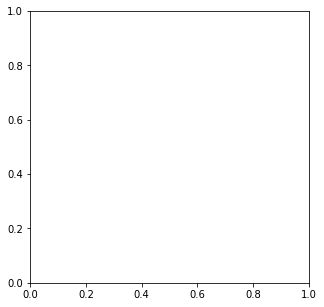

In [36]:
#But let's make it more interesting
#Let's make a visual representation of the model being updated
#Spoiler: that's why I chose only 2 variables to work with

#First let's build a plot that can function for this goal
#We will care about updating few things to make it work a little bit later
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

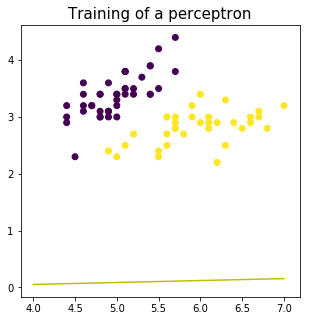

In [37]:
#Formula for calculating the seperation line:
#y = (-(b / w2) / (b / w1))x + (-b / w2)

#What we care about:
x = np.linspace(4, 7, 100)
y = (-(model[2]/model[1]) / (model[2]/model[0]) ) * x + (-model[2]/model[1])
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.plot(x, y, "y")
ax.set_title('Training of a perceptron', fontsize = 15)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_data[:, 2])
plt.show()

#We can see we have quite a decent plot but maybe our perceptron does not work fully well
#Maybe it did not run through enough itterations from before and the line is somewhere in a diffrent place...
#Which is obviously not good
#But hey, it works...if you run it for more itterations you will see that it actually gets fixed

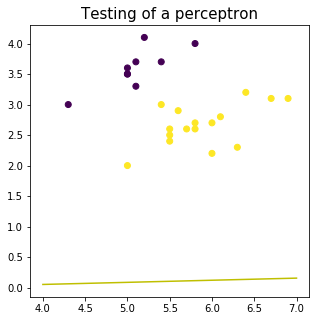

In [38]:
#We can try the same thing for our test data, as technically
#That's what we care the most
#Also...easier to program...les hassel
#Than creating a constantly updetable itterator on the training data

x = np.linspace(4, 7, 100)
y = (-(model[2]/model[1]) / (model[2]/model[0]) ) * x + (-model[2]/model[1])
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.plot(x, y, "y")
ax.set_title('Testing of a perceptron', fontsize = 15)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_data[:, 2])
plt.show()

#We do not have a lot of data, but the linear seperator here seems to work...not quite well
#As not enough itterations where ran to train it.
#This will be fixed and resolved later

Now, let's make history. Make a function...or several I guess...with the way everything was created we cannot put everything together in 1 function...OR CAN WE? Yes we can technically but it will get messy. Let's keep things easy and just perform slight modifications for the following:
- Create a function that will update the perceptron.
- Every 5-10 seconds a new update will be performed (pretend data is streamed to you).
- Every update will be followed by a visual representation of how well the perceptron functions with our test data.
    - Potentially also show the accuracy of the perceptron.
    
Things we assume:
- Perceptron was already initialized and that is done only once. Most likely Bob or John already did that for us.
- Our data file exists and it runs outside our knowledge, we just take the data and load it into the training of the perceptron.
- This perceptron is tailored to work with specific data we have - it's not universal, just for the iris data set (though yes, it is possible to make it more flexible, but for the context of this task - we have different goals).
- Our data is streamed into our datafile appropriatelly as it is already clean and not corrupted. That would bring a different level to all of this and is more related to data processing and cleaning. We assume Alex and Karen sit in an underground office and clean the data hand by hand and then stream it to us. We are really thanful, they are unappreciated enough colleagues, but life is life.

BONUS:
- From KNN Visualized tutorial we can add a functionality to color the background of our plot. For more details how that works - visit the KNN Visualized tutorial lesson thingie. Here for the sake of background coloring I droped the linearly separating data line as it was a bit redundant and affecting the plot at times in a negative fashion creating few visual issues. This method is also a little bit longer (by couple of seconds for each visual itteration) as a full backgroun needs to be assessed in how it needs to be colored (for KNN that was done only once and did not seem to be a problem, but here running 500 itterations really shows a bit of an issue). But it's all good - this is for academic purposes, in real life just note that this might be an undesirable issue and you might want to have the background of the plot colored only on the last instance of the training and use the linear seperating line for all other ones <- Just an idea.

In [39]:
#Let's prepare our data
train_data, test_data, model = data_prepare()

In [40]:
#Let's train our model and visualize the linear seperation with the perceptron
#We already have majority of our functions, we just need to addapt them
#And not to forget to stack them
def train_vis_perceptron(itterations = 20, delay = 5, train_data = train_data, test_data = train_data, model = model):
    """Execute training with our perceptron.
    *itterations - how many instances will be taken for training. Default - 20.
    *delay - how many seconds of a delay between each training sessions - helps for visualization. Default - 5 sec.
    *train_data - what the perceptron will train on. Assumed already prepared, but can be changed for other projects.
    *test_data - what the perceptron will test on. Assumed already prepared, but can be changed for other projects.
    *model - what model perceptron will use. Assumed already prepared, but can be changed for other projects."""
    
    from sklearn import datasets
    import numpy as np
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from IPython.display import clear_output
    from matplotlib.colors import ListedColormap 
    import time
    
    itterations = itterations
    delay = delay
    train_data = train_data
    test_data = test_data
    model = model
    
    def generate_read(train_data):
        """Generate and read data. One function for the price of one execution.""" 
        train_data = train_data

        def generator(XY_train = train_data):
            """Generate information to populate the file from the train_data we chose from before."""
            write_array = XY_train[np.random.randint(low = 0, high = (len(XY_train) - 1), dtype = int)]
            array_to_text = str()
            for i, value in enumerate(write_array):
                if i == 0:
                    array_to_text = array_to_text + str(value)
                else:
                    array_to_text = array_to_text + "," + str(value)
            array_to_text = array_to_text + "\n"
            outF = open("Information_Infolow.txt", "a")
            outF.writelines(array_to_text)
            outF.close()

        def read_data():
            """Read our newly generated data. Only the last line of it."""
            inF = open("Information_Infolow.txt")
            lineList = inF.readlines()
            inF.close()
            final_line = lineList[len(lineList)-1].strip()
            final_line = np.array(final_line.split(","), dtype = float)
            return final_line
        generator(train_data)
        return read_data()
    
    def predictor(data_to_predict_func):
        """Simple perceptrons prediction function. Feed it data to predict."""
        prediction = np.sum(data_to_predict_func[:2] * model[:2]) + model[2]
        prediction = 1 if prediction >= 0 else -1
        return prediction

    def update(data_to_predict):
        """A function that will update weights of the perceptron based on what it's situation is."""
        prediction = predictor(data_to_predict)
        if data_to_predict[2] == 0:
            data_to_predict[2] = -1
        if prediction == -1 and data_to_predict[2] == 1:
            model[:2] += data_to_predict[:2]
            model[2] += 1
        elif prediction == 1 and data_to_predict[2] == -1:
            model[:2] -= data_to_predict[:2]
            model[2] -= 1
            
    #We just need to prepare few additional variables to make the calculations just a tad bit faster
    cmap_bold = ListedColormap(['#FF0000', '#00FF00']) 
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA']) 
    
    x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
    y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
    h = 0.04
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    def ultimate_graph():
        """Draws our plot for visualizing the learning of a perceptron."""
        #Prepare the plots' background
        Z_field = []
        for i in range(len(np.c_[xx.ravel(), yy.ravel()])):
            temp_prediction = predictor(np.c_[xx.ravel(), yy.ravel()][i])
            Z_field.append(temp_prediction)
        Z = np.array(Z_field)
        Z = Z.reshape(xx.shape)
        
        #Preparing the full plot further       
        x = np.linspace(x_min, x_max, 100)
        y = (-(model[2]/model[1]) / (model[2]/model[0]) ) * x + (-model[2]/model[1])
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.set_title('Testing of a perceptron', fontsize = 15)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        plt.scatter(test_data[:, 0], test_data[:, 1], c = test_data[:, 2], cmap = cmap_bold)
        #plt.plot(x, y, "y") Earlier used line
        plt.show()
        
    #Let's make one more function that calculates the accuracy of the perceptron:
    def accuracy_check(test_data):
        """This function looks for how accurate the perceptron is on our test data."""
        measures_holder = []
        for instance in test_data:
            calculations = predictor(instance[:2])
            if (calculations == 1 and instance[2] == 1) or (calculations == -1 and instance[2] == 0):
                measures_holder.append(True)
            else:
                measures_holder.append(False)
        #Only true will be calculated and we will get our basic average accuracy
        accuracy_test = np.round(np.average(measures_holder)*100,2)
        return accuracy_test
    
    
    #Let us make a procedural training loop
    for itteration in range(itterations):
        #Before drawing let's clear the old ouput 
        clear_output()
        #Prepare the data for 1 instance
        temp_data = generate_read(train_data)
        #Update our model if necessery
        update(temp_data)
        accuracy_answer = accuracy_check(test_data)
        print("Itteration number {} is generated...".format(itteration + 1))
        print("Current accuracy is {}%".format(accuracy_answer))
        #Visualize it
        ultimate_graph()   
        time.sleep(delay)

Itteration number 100 is generated...
Current accuracy is 45.33%


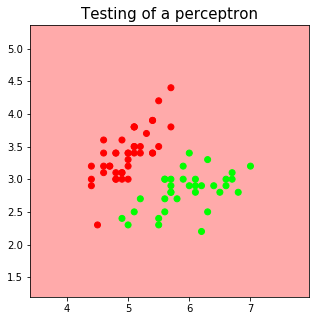

In [41]:
#I will only reduce the delay and take 100 itterations to train on
#Should take about ~200 seconds
train_vis_perceptron(itterations = 100, delay = 2)

#The colors on the plot represent one or another group of flowers
#As it can be seen after 100 itterations perceptron updated...somewhat
#Now it has an accuracy of 45.33% on our test data...
#Wow that's bad

Itteration number 500 is generated...
Current accuracy is 96.0%


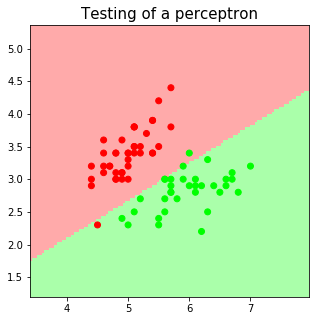

In [42]:
#I will train the perceptron once more continuing from where I left of above
#But for more itterations and with almost no dealy
train_vis_perceptron(itterations = 500, delay = 0.0001)
#It can be noticed that the accuracy increased.

#But the nature of perceptron is that it can also drop quite fast.
#Perceptron is sensitive to new data. 
#Therefore over time - training it can drop the accuracy for the test data as well
#This is also a good example of having not fully lineary seperable data
#As you can see one point is clearly falling into a different group (red on)

Itteration number 10 is generated...
Current accuracy is 98.67%


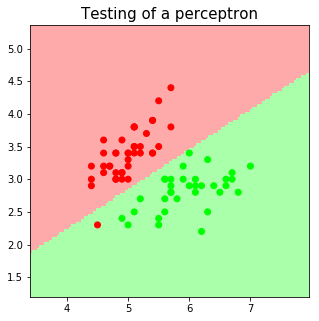

In [44]:
#Let me get the perceptron to almost an optimal value with smaller trainings (ran it 2 times)
train_vis_perceptron(itterations = 10, delay = 0.0001)

#This as good as we will get it after my observations
#Maybe a log tracker could be implemented to see how for the all training time was the accuracy

So there you go. A usage of perceptron with a concept of online data streaming for training. 
Get the .ipynb file and the txt one (or create on on your own, the functions are only fixed to the name of the file) and experiment for yourself.

Cheers!

In [45]:
#Bonus:
print("Currnet model weights: ", model)

Currnet model weights:  [ 12.  -19.7  -4. ]
